In [2]:
import pandas as pd

In [6]:
user_cols = ['user_id','age','gender','occupation','zip-code']
users = pd.read_table('http://bit.ly/movieusers',sep='|', names=user_cols, index_col='user_id',header=None)

In [7]:
users.head()

,age,gender,occupation,zip-code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [8]:
users.shape

(943, 4)

In [12]:
users.dtypes

age            int64
gender        object
occupation    object
zip-code      object
dtype: object

In [13]:
users.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


In [18]:
users.describe(include=['object','int64'])

,age,gender,occupation,zip-code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


In [19]:
users.columns

Index(['age', 'gender', 'occupation', 'zip-code'], dtype='object')

In [20]:
users.rename(columns={'gender':'Sex','zip_code':'pincode'}, inplace=True)

In [21]:
users.columns

Index(['age', 'Sex', 'occupation', 'zip-code'], dtype='object')

#### Chaning the header name at the time of import

In [22]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [23]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [24]:
# NOw we will try to change it read time itself
ufo_read = ['City', 'Colors_reported', 'Shape_reported', 'State', 'Time']
ufo = pd.read_csv('http://bit.ly/uforeports', names=ufo_read, header = 0)
ufo.columns

Index(['City', 'Colors_reported', 'Shape_reported', 'State', 'Time'], dtype='object')

In [27]:
ufo.columns = ufo.columns.str.replace('_','__')
ufo.columns

Index(['City', 'Colors__reported', 'Shape__reported', 'State', 'Time'], dtype='object')

YOu can pick up a series  then .str and then apply any of the string methods

####  Sorting a pandas series and dataframe

user sort_value() function

In [42]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [29]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [32]:
# Soritng the series but not affecting the underlying dataframe
# movies.duration.sort_values(ascending=False) 

In [41]:
# Sorting the dataframe
movies.sort_values(by=['genre','duration'], ascending=[False,True]).head()

,star_rating,title,content_rating,genre,duration,actors_list
236,8.1,High Noon,PG,Western,85,"[u'Gary Cooper', u'Grace Kelly', u'Thomas Mitc..."
704,7.6,High Plains Drifter,R,Western,105,"[u'Clint Eastwood', u'Verna Bloom', u'Marianna..."
119,8.3,Unforgiven,R,Western,131,"[u'Clint Eastwood', u'Gene Hackman', u'Morgan ..."
107,8.3,For a Few Dollars More,APPROVED,Western,132,"[u'Clint Eastwood', u'Lee Van Cleef', u'Gian M..."
421,7.9,The Outlaw Josey Wales,PG,Western,135,"[u'Clint Eastwood', u'Sondra Locke', u'Chief D..."


#### Filter rows of a dataframe by column values

In [3]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [4]:
movies.loc[movies.duration >=200, 'genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

In [7]:
movies.loc[(movies.duration >= 200) & (movies.genre =='Drama'), 'genre']


17     Drama
157    Drama
476    Drama
Name: genre, dtype: object

In [9]:
movies.loc[(movies.duration >= 200) & (movies.genre.isin( ['Drama'])), ['genre','duration']]

,genre,duration
17,Drama,207
157,Drama,238
476,Drama,242


#### Iterration over the rows of pandas dataframe

In [40]:
#  Uncomment to iterrate rowwisw on a pandas dataframe

# for i, row in movies.iterrows():
#     print(i)
# #     print(row)

In [37]:
#  axis 0 is euivalent to 'index'  and axis value 1 is equivalent to 'columns'
movies.mean(axis='index')
movies.mean(axis=0)
movies.mean(axis='columns')
movies.mean(axis=1).head()

0     75.65
1     92.10
2    104.55
3     80.50
4     81.45
dtype: float64

#### Use string 'str' methods in pandas
To use string methods in pandas we use 'str' 

In [14]:
order = pd.read_table('http://bit.ly/chiporders')

In [15]:
order.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [83]:
# suppose we want to make the item_name as upper case

# order.item_name.str.upper()
# order.item_name.str.contains('chicken')
order.choice_description.str.replace(r'[\[\]]',"").head()

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

#### change the dtype for a series in dataframe

In [30]:
import numpy as np
order.quantity =order.quantity.astype(np.float32,inplace=True)
print(order.quantity.dtype)

float32


In [36]:
order.item_price = order.item_price.str.replace('$','')
order.item_price = order.item_price.astype(np.float16)
print(order.item_price.dtype)
order.item_price.head()

float16


0     2.390625
1     3.390625
2     3.390625
3     2.390625
4    16.984375
Name: item_price, dtype: float16

In [35]:
order.item_name.str.contains('chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    0
Name: item_name, dtype: int32

#### groupby in pandas

In [45]:
drinks = pd.read_table('http://bit.ly/drinksbycountry',sep=',')

In [46]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [67]:
drinks.groupby('continent').sum()#.sum(axis=1)#.mean()#.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,3258,866,862,159.4
Asia,1630,2677,399,95.5
Europe,8720,5965,6400,387.8
North America,3345,3812,564,137.9
Oceania,1435,935,570,54.1
South America,2101,1377,749,75.7


In [69]:
drinks.groupby('continent').agg(['mean','count', 'min','max','sum'])

beer_servings                      spirit_servings            \
                       mean count min  max   sum            mean count min   
continent                                                                    
Africa            61.471698    53   0  376  3258       16.339623    53   0   
Asia              37.045455    44   0  247  1630       60.840909    44   0   
Europe           193.777778    45   0  361  8720      132.555556    45   0   
North America    145.434783    23   1  285  3345      165.739130    23  68   
Oceania           89.687500    16   0  306  1435       58.437500    16   0   
South America    175.083333    12  93  333  2101      114.750000    12  25   

                         wine_servings                       \
               max   sum          mean count min  max   sum   
continent                                                     
Africa         152   866     16.264151    53   0  233   862   
Asia           326  2677      9.068182    44   0  123   399   
Europe         373  5965    142.222222    45   0  370  6400   
North America  438  3812     24.521739    23   1  100   564   
Oceania        254   935     35.625000    16   0  212   570   
South America  302  1377     62.416667    12   1  221   749   

              total_litres_of_pure_alcohol                          
                                      mean count  min   max    sum  
continent                                                           
Africa                            3.007547    53  0.0   9.1  159.4  
Asia                              2.170455    44  0.0  11.5   95.5  
Europe                            8.617778    45  0.0  14.4  387.8  
North America                     5.995652    23  2.2  11.9  137.9  
Oceania                           3.381250    16  0.0  10.4   54.1  
South America                     6.308333    12  3.8   8.3   75.7

In [71]:
%matplotlib inline

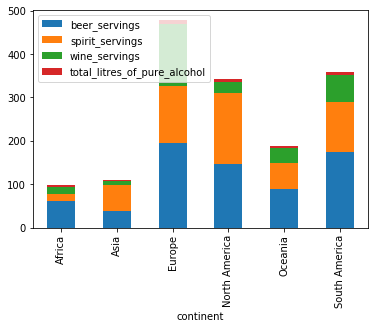

In [93]:
drinks.groupby('continent').mean().plot(kind='bar',stacked=True)

In [82]:
# to get the index of row for which the max values is found
drinks.groupby('continent').idxmax()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,117,96,55,124.0
Asia,141,141,92,141.0
Europe,45,15,61,15.0
North America,130,68,32,68.0
Oceania,129,40,8,8.0
South America,188,72,6,6.0


In [81]:
# this can be done to get the country name directly for the max serving for each spirit type:
#  but HERE THE ASSUMPTION IS COUNTRY ARE UNIQUE IN EACH ROW.
drinks.set_index('country').groupby('continent').idxmax()

,beer_servings,spirit_servings,total_litres_of_pure_alcohol,wine_servings
continent,,,,
Africa,Namibia,Liberia,Nigeria,Equatorial Guinea
Asia,Russian Federation,Russian Federation,Russian Federation,Laos
Europe,Czech Republic,Belarus,Belarus,France
North America,Panama,Grenada,Grenada,Canada
Oceania,Palau,Cook Islands,Australia,Australia
South America,Venezuela,Guyana,Argentina,Argentina


In [92]:
# for single spirit this can be used even in case of reapeated countries ie. country not neccessary be unique
drinks.loc[drinks.reset_index().groupby('continent').beer_servings.idxmax()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,Africa
141,Russian Federation,247,326,73,11.5,Asia
45,Czech Republic,361,170,134,11.8,Europe
130,Panama,285,104,18,7.2,North America
129,Palau,306,63,23,6.9,Oceania
188,Venezuela,333,100,3,7.7,South America


In [90]:
drinks.loc[drinks.groupby('continent').beer_servings.idxmax()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,Africa
141,Russian Federation,247,326,73,11.5,Asia
45,Czech Republic,361,170,134,11.8,Europe
130,Panama,285,104,18,7.2,North America
129,Palau,306,63,23,6.9,Oceania
188,Venezuela,333,100,3,7.7,South America


####  Explore a pandas Series

In [94]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [95]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [101]:
# gets the count of each values ie. how many times that value has appeared in the series
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

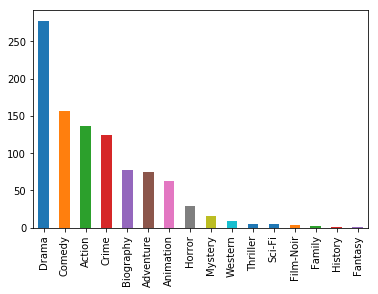

In [98]:
#  need to run %matplpotlib inline before for plots to appear in  notebook
movies.genre.value_counts().plot(kind='bar')

In [99]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [100]:
movies.genre.nunique()

16

In [113]:
#  to see the cor relation between two catgegorical series 

pd.crosstab(movies.genre,movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


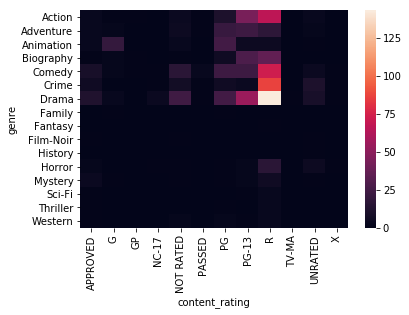

In [114]:
# For visualization we can use seaborn heatmaps.
import seaborn as sns
sns.heatmap(pd.crosstab(movies.genre,movies.content_rating))

In [ ]:
bb